# Load ADNIMERGE & Biomarkers

In [2]:
%run ./ADNI-Biomarkers-Preprocess.ipynb


Following locations can be used : 

`NOTEBOOKS_DIR`, `MANUSCRIPT_DIR`, `CODE_DIR`, `DATA_DIR`

Following locations can be used : 

`NOTEBOOKS_DIR`, `MANUSCRIPT_DIR`, `CODE_DIR`, `DATA_DIR`

Use `loadCSVtoDF` to load data into dataframes from folder: `SOME_DATA_DIR/raw/SOME_DATASET/SOME_MARKER/SOME_LAB` 

<IPython.core.display.Javascript object>

-----------------------
Dataframes are available in the object - dataframes - with keys as [dataset], [marker], [file], [df | dict]

E.g : dataframes["PLASMA"]["ABETA"]["FNIH_SHIMADZU_1_GO_2_2021-05-25"]["df"] and 
dataframes["PLASMA"]["ABETA"]["FNIH_SHIMADZU_1_GO_2_2021-05-25"]["dict"] and 

If the dataset is of not a specific measure, they are under the marker - ALL
E.g : dataframes["CSF"]["ALL"]["LOCALLAB_1_GO_2_3_2022-01-24"]["df"] 


df
dict
The mapping of Brain region to ADNI MRI FreeSurfer column :


`MRI_REGIONS_VOLUME`

*For future purposes, surface area of some regions is also available*

`MRI_REGIONS_SURFACE_AREA`

--
dataframe dictionary for PLASMA ABETA {}: plasma_abeta
with columns :  ['RID', 'VISCODE', 'PLASMA_AB42', 'PLASMA_AB40', 'PLASMA_AB4240', 'update_stamp', 'source']
MRI Sources :  UCSF_FS5_1_GO_2_2021-12-13, UCSF_FS6_3_2021-12-13
CSF Sources considered:  UPENN_ELECSYS_3_Bt1_2019-07-29, UPENN_ELECSYS_1_GO_2_2017-04-19, UPENN_ELECSYS_1_GO_2_3_2021-01-04
Plasma NFL Sources :  BLENNOWLAB_ADNI_1_2018-10-03, BLENNOWLAB_1_GO_2_2018-10-03


*Use the following dataframe*

`getADNICombined(base_fields_of_interest)`

# Analyses

In [3]:
identifiers = ['RID', 'VISCODE', 'VS_MONTH', 'Month', 'EXAMDATE']
demographics = ['AGE', 
                'PTGENDER', 
               'PTEDUCAT', 
                 'ETHNICRACE', # 'PTETHCAT', 'PTRACCAT'
                'PTMARRY']
genetics = ['APOE4']# FAMILY_HISTORY - Later]

health = []# BMI] # Activity of daily living
cognitive_function = [
    'RAVLT_immediate',  # WM
                      'RAVLT_learning', 
                      'RAVLT_forgetting', #AD related
                     'ADAS11', 
                      'TRABSCOR'
#                       #'RAVLT_perc_forgetting',
    #'FAQ', # 'MOCA',#'ADASQ4', 
                     ]
outcomes = [ 'DX_bl', 'DX']
outcomes += ['DX_bl_std']
fields_of_interest_adnimerge = identifiers + demographics + genetics  \
+ cognitive_function + ['FAQ', 'MMSE'] \
+ outcomes


In [4]:
ADM_5YR_COMBINED = getADNICombined(fields_of_interest_adnimerge)


ADNIMERGE + Biomarkers, shape : (8734, 54)


In [5]:
ADM_5YR_COMBINED.columns

Index(['RID', 'VISCODE', 'VS_MONTH', 'Month', 'EXAMDATE', 'AGE', 'PTGENDER',
       'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'RAVLT_immediate',
       'RAVLT_learning', 'RAVLT_forgetting', 'ADAS11', 'TRABSCOR', 'FAQ',
       'MMSE', 'DX_bl', 'DX', 'DX_bl_std', 'DX_bl_std', 'CN_CHANGE',
       'AD_CHANGE', 'MCI_DEM_CHANGE', 'VS_MONTH_MAX', 'GDTOTAL', 'CDGLOBAL',
       'PET_SUVR_ABETA', 'ABP', 'ABP_HIGH', 'VOL_AMYGDALA', 'VOL_CAUDATE',
       'VOL_ENTORHINAL', 'VOL_FUSIFORM', 'VOL_HIPPOCAMPUS', 'VOL_ICV',
       'VOL_INFERIORPARIETAL', 'VOL_INFERIORTEMPORAL', 'VOL_MIDDLETEMPORAL',
       'VOL_PALLIDUM', 'VOL_PARAHIPPOCAMPAL', 'VOL_PUTAMEN',
       'VOL_SUPERIORFRONTAL', 'VOL_SUPERIORPARIETAL', 'VOL_SUPERIORTEMPORAL',
       'VOL_TEMPORALPOLE', 'VOL_THALAMUS', 'CSF_AB42', 'CSF_TAU', 'CSF_PTAU',
       'CSF_AB4240', 'PLASMA_NFL', 'PLASMA_PTAU'],
      dtype='object')

## Load Preprocessing Helper Methods

In [6]:
%run ./ADNI-Biomarkers-PreProcess-Methods.ipynb


In [7]:
demog = ADNIdemographics(ADM[['RID']+demographics+genetics+outcomes][ADM.VS_MONTH == 0]\
                        , ['AGE', 'PTEDUCAT']\
                        , ['PTGENDER', 'ETHNICRACE', 'PTMARRY', 'APOE4'])
# demog.rename(columns={'3andMore' : '≥3'}, inplace=True)
demog_ = demog.fillna(' ')
demog_cog = ADNIdemographics(ADM[['RID']+demographics+outcomes+ cognitive_function][ADM.VS_MONTH == 0]\
                        , cognitive_function\
                        , [])
# demog.rename(columns={'3andMore' : '≥3'}, inplace=True)
demog_cog = demog_cog.fillna(' ')
demographics_table = pd.concat([demog_, demog_cog])
demographics_table

All Participants  \
                                                                          
                       Count                            2013              
                       Age, mean(SD), y                 73.4(7.1)         
                       Years of Education, mean(SD), y  16.0(2.8)         
Gender                 Gender                                             
                       Female                           925(45)           
                       Male                             1088(54)          
Race / Ethnicity       Race / Ethnicity                                   
                       Black or African American        82(4)             
                       Hispanic White                   51(2)             
                       Non-hispanic White               1812(90)          
                       Other                            68(3)             
Marital Status         Marital Status                                     
                       0                                465(23)           
                       1                                1548(76)          
APOE ε4 allele(s), > 0 APOE ε4 allele(s), > 0                             
                       0                                1064(52)          
                       1                                730(36)           
                       2.0                              194(9)            
                       Count                            2013              
                       RAVLT Immediate                  36.2(12.7)        
                       RAVLT Learning                   4.4(2.8)          
                       RAVLT Forgetting                 4.3(2.6)          
                       ADAS(cog, 11)                    10.3(6.5)         
                       Trail (B)                        116.8(73.4)       

                                                                CN  \
                                                                     
                       Count                            700(35)      
                       Age, mean(SD), y                 73.2(6.1)    
                       Years of Education, mean(SD), y  16.5(2.6)    
Gender                 Gender                                        
                       Female                           382(54)      
                       Male                             318(45)      
Race / Ethnicity       Race / Ethnicity                              
                       Black or African American        41(5)        
                       Hispanic White                   18(2)        
                       Non-hispanic White               617(88)      
                       Other                            24(3)        
Marital Status         Marital Status                                
                       0                                205(29)      
                       1                                495(70)      
APOE ε4 allele(s), > 0 APOE ε4 allele(s), > 0                        
                       0                                485(69)      
                       1                                192(27)      
                       2.0                              19(2)        
                       Count                            700(35)      
                       RAVLT Immediate                  45.5(9.9)    
                       RAVLT Learning                   6.1(2.3)     
                       RAVLT Forgetting                 3.7(3.0)     
                       ADAS(cog, 11)                    5.7(2.9)     
                       Trail (B)                        82.2(42.0)   

                                                           Dementia  \
                                                                      
                       Count                            350(17)       
                       Age, mean(SD), y                 74.7(7.8)     

# Model definitions

## Sample characteristics for MCI population

In [8]:
ABP_field = 'ABP'
ADM_MCI = getMCIData(ADM_5YR_COMBINED,ABP_field=ABP_field)
ADM_MCI_AB = ADM_MCI.dropna(subset=[ABP_field])
mci_demog = ADNIdemographics(ADM_MCI_AB[['RID', 'ABP_cat']+demographics+genetics+outcomes][ADM_MCI_AB.VS_MONTH == 0]\
                        , ['AGE', 'PTEDUCAT']\
                        , ['PTGENDER', 'ETHNICRACE', 'PTMARRY', 'APOE4']\
                        , category_field = "ABP_cat")
# demog.rename(columns={'3andMore' : '≥3'}, inplace=True)
mci_demog_ = mci_demog.fillna(' ')
mci_demog_cog = ADNIdemographics(ADM_MCI_AB[['RID', 'ABP_cat']+demographics+outcomes+ cognitive_function][ADM_MCI_AB.VS_MONTH == 0]\
                        , cognitive_function\
                        , ['PTGENDER']\
                        , category_field = "ABP_cat")
# demog.rename(columns={'3andMore' : '≥3'}, inplace=True)
mci_demog_cog = mci_demog_cog.fillna(' ')
mci_demographics_table = pd.concat([mci_demog_, mci_demog_cog])
mci_demographics_table

All Participants  \
                                                                          
                       Count                            492               
                       Age, mean(SD), y                 71.9(7.4)         
                       Years of Education, mean(SD), y  16.3(2.6)         
Gender                 Gender                                             
                       Female                           217(44)           
                       Male                             275(55)           
Race / Ethnicity       Race / Ethnicity                                   
                       Black or African American        12(2)             
                       Hispanic White                   12(2)             
                       Non-hispanic White               450(91)           
                       Other                            18(3)             
Marital Status         Marital Status                                     
                       0                                116(23)           
                       1                                376(76)           
APOE ε4 allele(s), > 0 APOE ε4 allele(s), > 0                             
                       0                                251(51)           
                       1                                185(37)           
                       2.0                              50(10)            
                       Count                            492               
                       RAVLT Immediate                  36.8(10.9)        
                       RAVLT Learning                   4.7(2.6)          
                       RAVLT Forgetting                 4.5(2.7)          
                       ADAS(cog, 11)                    9.3(4.4)          
                       Trail (B)                        106.4(58.2)       
Gender                 Gender                                             
                       Female                           217(44)           
                       Male                             275(55)           

                                                               Aβ-  \
                                                                     
                       Count                            215(44)      
                       Age, mean(SD), y                 70.4(7.9)    
                       Years of Education, mean(SD), y  16.4(2.5)    
Gender                 Gender                                        
                       Female                           94(43)       
                       Male                             121(56)      
Race / Ethnicity       Race / Ethnicity                              
                       Black or African American        5(2)         
                       Hispanic White                   5(2)         
                       Non-hispanic White               194(90)      
                       Other                            11(5)        
Marital Status         Marital Status                                
                       0                                54(25)       
                       1                                161(74)      
APOE ε4 allele(s), > 0 APOE ε4 allele(s), > 0                        
                       0                                162(75)      
                       1                                45(20)       
                       2.0                              6(2)         
                       Count                            215(44)      
                       RAVLT Immediate                  40.3(10.9)   
                       RAVLT Learning                   5.3(2.4)     
                       RAVLT Forgetting                 4.1(3.1)     
                       ADAS(cog, 11)                    7.7(3.5)     
                       Trail (B)                        94.0(46.2)   
Gender                 Gender                              

In [9]:
ADM_MCI

,RID,VISCODE,VS_MONTH,Month,EXAMDATE,AGE,PTGENDER,PTEDUCAT,ETHNICRACE,PTMARRY,...,CSF_AB4240,PLASMA_NFL,PLASMA_PTAU,ABP_cat,ABP_DEM_6,ABP_DEM_12,ABP_DEM_36,ABP_DEM_24,ABP_DEM_48,ABP_DEM_60
0,4,bl,0,0,2005-11-08,67.5,Male,10,Hispanic White,1,...,NaN,31.2,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
1,6,bl,0,0,2005-11-29,80.4,Female,13,Non-hispanic White,1,...,NaN,52.5,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN
2,38,bl,0,0,2005-12-15,76.8,Male,12,Non-hispanic White,1,...,NaN,28.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,42,bl,0,0,2005-11-10,72.8,Male,18,Non-hispanic White,1,...,NaN,NaN,NaN,NaN,0.0,1.0,1.0,1.0,1.0,1.0
4,45,bl,0,0,2006-01-11,85.9,Male,18,Non-hispanic White,0,...,NaN,40.4,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,6844,bl,0,0,2020-01-13,76.2,Female,19,Non-hispanic White,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
962,6846,bl,0,0,2020-01-23,77.1,Male,18,Non-hispanic White,1,...,0.02345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
963,6852,bl,0,0,2020-02-19,76.4,Male,18,Black or African American,1,...,NaN,NaN,NaN,Aβ+,NaN,0.0,NaN,NaN,NaN,NaN
964,6857,bl,0,0,2020-03-09,71.4,Male,16,Non-hispanic White,1,...,NaN,NaN,NaN,Aβ-,NaN,0.0,NaN,NaN,NaN,NaN


## Study Characteristics

In [10]:
FOLLOWUP_MONTH = 24
# ADM_CN_BL = ADM_5YR_COMBINED[(ADM_5YR_COMBINED["CN_S_"+str(FOLLOWUP_MONTH)] == True) &(ADM_5YR_COMBINED.VS_MONTH == 0)] 
ADM_CN_BL = getCNBLData(ADM_5YR_COMBINED)
ADM_AD_BL = getAD_BL(ADM_5YR_COMBINED)
ADM_5YR_COMBINED_TRAIN = getCNandABP_ADTrain(ADM_CN_BL, ADM_AD_BL, ABP_field, FOLLOWUP_MONTH)
ADM_MCI = getMCIData(ADM_5YR_COMBINED, ABP_field)
getNulls(ADM_MCI);
df = ADM_5YR_COMBINED.copy()#.dropna()
study_chars = printStudyCharacteristics(df, FOLLOWUP_MONTH, ABP_field)
study_chars

AD Remain :  345


,metric,count
0,Participants with at least one follow-up,2013
1,CN Total (Baseline),700
2,AD Total (Baseline),350
3,MCI Total (Baseline),963
4,CN Total (2.0 yr. followup),569
5,CN Stable (2.0 yr. followup),534
6,CN Decline,35
7,Dementia Remain,345
8,"Dementia Remain, AB+",131
9,AD Reverse,5


In [11]:
ADM_MCI.groupby('ABP_DEM_24').ABP.value_counts()

ABP_DEM_24  ABP
0.0         0.0    178
            1.0    146
1.0         1.0    61 
            0.0    6  
Name: ABP, dtype: int64

In [12]:
ADM_CN_BL.ABP.value_counts()

0.0    246
1.0    121
Name: ABP, dtype: int64

In [13]:
df[df.DX_bl.isin(['AD']) & (df.VISCODE == 'bl')].shape[0]
ADM_AD_BL.shape[0]

345

# Classification
* Random Forests
* Training : CN-s vs AD*(Dementia + AB+)
* Prediction : CN-like or AD-like in MCI data (specific follow-up visit)

## Features by Modality

In [14]:
mri_fields = MRI_ICV_NORMALISED.drop(['RID', 'VISCODE', 'VOL_ICV'], axis=1).columns.tolist()
csf_fields = [
    'CSF_AB42', 
    'CSF_TAU', 
    'CSF_PTAU']
csf_fields_supp = [
    'CSF_AB4240', 
    'CSF_TAU', 
    'CSF_PTAU']
plasma_ptau_fields = ["PLASMA_PTAU"]
plasma_nfl_fields = ["PLASMA_NFL"]
plasma = ["PLASMA_PTAU", "PLASMA_NFL"]


In [16]:
all_features = demographics + genetics + csf_fields + plasma + ['VOL_HIPPOCAMPUS'] + cognitive_function
print(all_features)
# getNulls(adm)
# mci = getMCIData(ADM_5YR_COMBINED)[all_features + ['ABP_DEM_24']]
# mci.shape
# getNulls(mci)

['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'CSF_AB42', 'CSF_TAU', 'CSF_PTAU', 'PLASMA_PTAU', 'PLASMA_NFL', 'VOL_HIPPOCAMPUS', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'ADAS11', 'TRABSCOR']


## Train data

In [17]:
ADM_5YR_COMBINED_TRAIN.columns

Index(['RID', 'VISCODE', 'VS_MONTH', 'Month', 'EXAMDATE', 'AGE', 'PTGENDER',
       'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'RAVLT_immediate',
       'RAVLT_learning', 'RAVLT_forgetting', 'ADAS11', 'TRABSCOR', 'FAQ',
       'MMSE', 'DX_bl', 'DX', 'DX_bl_std', 'DX_bl_std', 'CN_CHANGE',
       'AD_CHANGE', 'MCI_DEM_CHANGE', 'VS_MONTH_MAX', 'GDTOTAL', 'CDGLOBAL',
       'PET_SUVR_ABETA', 'ABP', 'ABP_HIGH', 'VOL_AMYGDALA', 'VOL_CAUDATE',
       'VOL_ENTORHINAL', 'VOL_FUSIFORM', 'VOL_HIPPOCAMPUS', 'VOL_ICV',
       'VOL_INFERIORPARIETAL', 'VOL_INFERIORTEMPORAL', 'VOL_MIDDLETEMPORAL',
       'VOL_PALLIDUM', 'VOL_PARAHIPPOCAMPAL', 'VOL_PUTAMEN',
       'VOL_SUPERIORFRONTAL', 'VOL_SUPERIORPARIETAL', 'VOL_SUPERIORTEMPORAL',
       'VOL_TEMPORALPOLE', 'VOL_THALAMUS', 'CSF_AB42', 'CSF_TAU', 'CSF_PTAU',
       'CSF_AB4240', 'PLASMA_NFL', 'PLASMA_PTAU', 'ABP_DEM'],
      dtype='object')

In [18]:
not_null_subset = demographics + genetics + \
                    plasma_ptau_fields + plasma_nfl_fields + \
                    csf_fields + ['VOL_HIPPOCAMPUS']

TRAIN_DATA = ADM_5YR_COMBINED_TRAIN.dropna(subset = not_null_subset)


In [19]:
TRAIN_DATA.groupby('ABP_DEM').ABP.value_counts()

ABP_DEM  ABP
0        0.0    92
         1.0    64
1        1.0    97
Name: ABP, dtype: int64

## Featuresets for model exploration

In [26]:
features_by_modality = {
    "base" : {"cols" : demographics, "label" : 'D'},
    "genetics" : {"cols" : genetics, "label" : 'APOE4'},
    "base-genetics" : {"cols" : demographics+genetics, "label" : 'DA'},
    "plasma_ptau" : {"cols" : plasma_ptau_fields, "label" : 'Plasma pTAU'},
    "plasma_nfl" : {"cols" : plasma_nfl_fields, "label" : 'Plasma NFL'},
    "plasma" : {"cols" : plasma_ptau_fields + plasma_nfl_fields, "label" : 'P'},
    "csf" : {"cols" : csf_fields, "label" : 'C'},
    "csf_supp" : {"cols" : csf_fields_supp, "label" : 'C_supp'},
    "hipp" : {"cols" : ['VOL_HIPPOCAMPUS'], "label" : 'H'},
    "cog" : {"cols" : cognitive_function, "label" : 'NP'},
}
feature_sets_ = [
    {"key": ["base"]},
    {"key": ["base-genetics"]},
    {"key": ["base-genetics", "plasma"]},
    {"key": ["base-genetics", "csf"]},
    # {"key": ["base-genetics", "csf_supp"]},
    {"key": ["base-genetics", "plasma", "csf"]},
    {"key": ["base-genetics", "hipp"]},
    {"key": ["base-genetics", "plasma", "csf", "hipp"]},
#     {"key": ["base", "genetics", "plasma", "hipp"]},
    {"key": ["base-genetics", "csf", "hipp"]},
    {"key": ["base-genetics", "cog"]},
    # {"key": ["base", "genetics", "plasma", "hipp", "csf", "cog"]},
    ]

models_and_fields = pd.DataFrame(features_by_modality).transpose()



## Load Modeling Helper Methods

In [27]:
%run ./ADNI-Biomarkers-Modeling-Methods.ipynb


## Run Models

In [28]:
output_ref=None

## Load selected features

In [29]:
import seaborn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


### Metrics dataframes

training_metrics = OverallMetrics() #pd.DataFrame()
final_metrics_ = OverallMetrics() #pd.DataFrame() 

final_imp_features = pd.DataFrame()

metrics_by_feature_addition = MetricsByFeatureAddition() #pd.DataFrame()
MCI_metrics_by_feature_addition = MetricsByFeatureAddition() #pd.DataFrame()
auc_by_feature_addition = pd.DataFrame()

ALLMETRICS = {"train" : {
                "all" : training_metrics,
                "feature_addition" : metrics_by_feature_addition
             },
             "test": {
                 "all" : final_metrics_,
                 "feature_addition" : MCI_metrics_by_feature_addition
             }
             }

train_ycol = 'ABP_DEM'

##Test MCI
test_ycol = 'ABP_DEM_'+str(FOLLOWUP_MONTH)

output = []

TRAIN_DATA = TRAIN_DATA.sample(frac = 1, random_state=111).reset_index().drop(['index'], axis=1)

# # Shuffle the dataset
# adm = adm.sample(frac = 1).reset_index().drop(['index'], axis=1)

In [30]:
TRAIN_DATA

,RID,VISCODE,VS_MONTH,Month,EXAMDATE,AGE,PTGENDER,PTEDUCAT,ETHNICRACE,PTMARRY,...,VOL_SUPERIORTEMPORAL,VOL_TEMPORALPOLE,VOL_THALAMUS,CSF_AB42,CSF_TAU,CSF_PTAU,CSF_AB4240,PLASMA_NFL,PLASMA_PTAU,ABP_DEM
0,4151,bl,0,0,2011-08-29,72.2,Male,14,Non-hispanic White,1,...,311.656806,16.171075,107.006914,492.7,189.60,17.850,NaN,27.2,12.978,0
1,5242,bl,0,0,2013-07-11,67.2,Male,20,Non-hispanic White,1,...,294.231062,11.850417,107.527026,1306.0,302.50,27.060,NaN,22.8,1.898,0
2,4730,bl,0,0,2012-06-05,81.1,Female,12,Non-hispanic White,0,...,262.001006,8.318801,87.089028,588.2,280.00,24.060,NaN,94.6,30.853,1
3,5244,bl,0,0,2013-07-31,75.8,Female,16,Non-hispanic White,0,...,263.594146,11.151936,95.951889,1681.0,161.10,14.630,NaN,21.4,12.224,0
4,4971,bl,0,0,2012-11-07,76.4,Male,18,Non-hispanic White,1,...,208.593856,8.632173,92.328872,471.3,286.70,28.660,NaN,42.0,37.821,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,4604,bl,0,0,2012-04-05,65.0,Male,19,Non-hispanic White,1,...,310.113606,17.100466,90.924478,1274.5,156.85,13.835,0.085869,27.4,17.348,0
250,4177,bl,0,0,2011-09-07,84.9,Male,20,Non-hispanic White,1,...,282.821299,13.052709,98.260363,924.7,177.90,15.280,NaN,58.7,20.649,0
251,4503,bl,0,0,2012-03-15,71.7,Female,19,Non-hispanic White,0,...,297.472401,15.612667,98.735913,1245.0,180.10,17.100,NaN,84.6,6.791,0
252,4577,bl,0,0,2012-03-28,84.7,Male,20,Black or African American,1,...,250.738937,13.093106,101.229250,318.3,134.50,12.840,NaN,41.5,17.516,0


## Run the Models

In [ ]:
trainandtest_CV(TRAIN_DATA, feature_cols, train_ycol, model_label, ALLMETRICS) 

In [304]:
fc = ['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'CSF_AB4240', 'CSF_TAU', 'CSF_PTAU']
model_label = 'DA + C_supp'
# trainandtest_CV(TRAIN_DATA, fc, train_ycol, model_label, ALLMETRICS) 

TRAIN_DATA[fc].dropna(subset='CSF_AB4240').shape

(34, 9)

In [31]:
for feature_set in feature_sets_ : 
    feature_keys = feature_set["key"]
    feature_cols = functools.reduce(lambda a, b: a+features_by_modality[b]["cols"]
                                    , feature_keys, [])
    model_labels = functools.reduce(lambda a, b: a+[features_by_modality[b]["label"]]
                                    , feature_keys, [])
    model_label = ('+').join(model_labels)
    
    print('Running for ', model_label)
    print('Running with ', feature_cols)
    clf, ALLMETRICS, feature_imp = trainandtest_CV(TRAIN_DATA, feature_cols, train_ycol, model_label, ALLMETRICS) 

    ### Feature Engineering
    if(not output_ref) :
        fields_final_model, ALLMETRICS = feature_engineer_CV(TRAIN_DATA, feature_cols, train_ycol, model_label, ALLMETRICS)
        ### Models with final features
        clf_final, ALLMETRICS, feature_imp_final  = trainandtest_CV(TRAIN_DATA, fields_final_model, train_ycol, model_label, ALLMETRICS,
                                                   model_type='FINAL', ft_eng=False) 

    else:
        ### Models with final features
        fields_final_model = output_ref[model_label]["final_features"]
        clf_final, ALLMETRICS, feature_imp_final  = trainandtest_CV(TRAIN_DATA, fields_final_model, train_ycol, model_label, ALLMETRICS,
                                                   model_type='FINAL', ft_eng=False) 
        
            
    
    chi2, p = mcnemar_test(TRAIN_DATA, feature_cols, fields_final_model, train_ycol, test_ycol)
    ### Save model output
    output.append({"key" : feature_set["key"], "model" : clf, "cols" : feature_cols, "label" : model_label, 
                   "feature_weights": feature_imp, 
                   "final_features" : fields_final_model,
                   "mcnemar-p" : p
                  })
    
    print("mcnemar-p", p)
    print('--------')

Running for  D
Running with  ['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY']
['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY']
Feature importance by permutation...
Feature engineering : AGE, PTMARRY, PTEDUCAT, ETHNICRACE, PTGENDER, ['AGE', 'PTGENDER']
['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY']
[[265 131]
 [117 221]]
mcnemar-p 0.4091383616099853
--------
Running for  DA
Running with  ['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4']
['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4']
Feature importance by permutation...
Feature engineering : APOE4, AGE, PTMARRY, PTEDUCAT, ETHNICRACE, PTGENDER, ['APOE4', 'AGE', 'PTMARRY', 'PTEDUCAT']
['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4']
[[390  54]
 [ 50 234]]
mcnemar-p 0.7687918101386724
--------
Running for  DA+P
Running with  ['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'PLASMA_PTAU', 'PLASMA_NFL']
['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 

In [294]:
ALLMETRICS["train"]["all"].getDF();

# Results

## Saving Outputs

In [32]:
from datetime import datetime
today = datetime.now().strftime('%Y%m%d')
day = "20220915-Manuscript"
day = "20220915"
day = today
OUTPUT_FOLDER = "../../AD/manuscripts/ADNI-BBM/"
import pickle
# day = "20220915"
# FOLLOWUP_MONTH=48
tables_folder = OUTPUT_FOLDER + "Tables/"+str(day)+"/"+str(FOLLOWUP_MONTH)
results_folder = OUTPUT_FOLDER + "Tables/"+str(day)+"/"+str(FOLLOWUP_MONTH)
if not os.path.exists(tables_folder):
    os.makedirs(tables_folder)

figures_folder = OUTPUT_FOLDER + "Figures/"+str(day)+"/"+str(FOLLOWUP_MONTH)
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)
    
# output_file_path = results_folder + "/output.obj"

## Save Raw results 

In [33]:

fileObj = open(tables_folder + "/output.obj", 'wb')
pickle.dump(output,fileObj)
fileObj.close()

training_metrics_df = training_metrics.getDF()
pred_metrics_df = final_metrics_.getDF()
metrics_by_feature_addition_df = metrics_by_feature_addition.getDF()
MCI_metrics_by_feature_addition_df = MCI_metrics_by_feature_addition.getDF()

training_metrics_df.to_pickle(tables_folder + "/training_metrics_df.pkl")
pred_metrics_df.to_pickle(tables_folder + "/pred_metrics_df.pkl")
metrics_by_feature_addition_df.to_pickle(tables_folder + "/metrics_by_feature_addition_df.pkl")
MCI_metrics_by_feature_addition_df.to_pickle(tables_folder + "/MCI_metrics_by_feature_addition_df.pkl")

## Load previous results

In [137]:
import pickle
loadPrevious = True
if loadPrevious:
    FOLLOWUP_MONTH = 48
    OUTPUT_FOLDER = "../../AD/manuscripts/ADNI-BBM/"
    day = "20220915-Manuscript"
    results_folder = OUTPUT_FOLDER + "Tables/"+str(day)+"/"+str(FOLLOWUP_MONTH)
    fileObj = open(results_folder + "/output.obj", 'rb')
    output = pickle.load(fileObj)
    fileObj.close()

    training_metrics_df = pd.read_pickle(results_folder + "/training_metrics_df.pkl") 
    pred_metrics_df = pd.read_pickle(results_folder + "/pred_metrics_df.pkl") 
    metrics_by_feature_addition_df = pd.read_pickle(results_folder + "/metrics_by_feature_addition_df.pkl") 
    MCI_metrics_by_feature_addition_df = pd.read_pickle(results_folder + "/MCI_metrics_by_feature_addition_df.pkl") 


if not os.path.exists(tables_folder):
    os.makedirs(tables_folder)

figures_folder = OUTPUT_FOLDER + "Figures/"+str(day)+"/"+str(FOLLOWUP_MONTH)
if not os.path.exists(figures_folder):
    os.makedirs(figures_folder)



## Selected Features by Model

['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY']
[[266 134]
 [117 217]]
D 117 0.3125355382626737
['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4']
[[398  50]
 [ 46 234]]
DA 46 0.7596492883236297
['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'PLASMA_PTAU', 'PLASMA_NFL']
[[241  24]
 [ 19  79]]
DA+P 19 0.542384011856484
['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'CSF_AB42', 'CSF_TAU', 'CSF_PTAU']
[[297  18]
 [ 23 119]]
DA+C 18 0.5327092552361137
['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'PLASMA_PTAU', 'PLASMA_NFL', 'CSF_AB42', 'CSF_TAU', 'CSF_PTAU']
[[205   9]
 [  6  59]]
DA+P+C 0.26666666666666666 0.6055766163353462
['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'VOL_HIPPOCAMPUS']
[[244  35]
 [ 27 103]]
DA+H 27 0.37415171240479483
['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'PLASMA_PTAU', 'PLASMA_NFL', 'CSF_AB42', 'CSF_TAU', 'CSF_PTAU', 'VOL_HIPPOCAMPUS']
[[

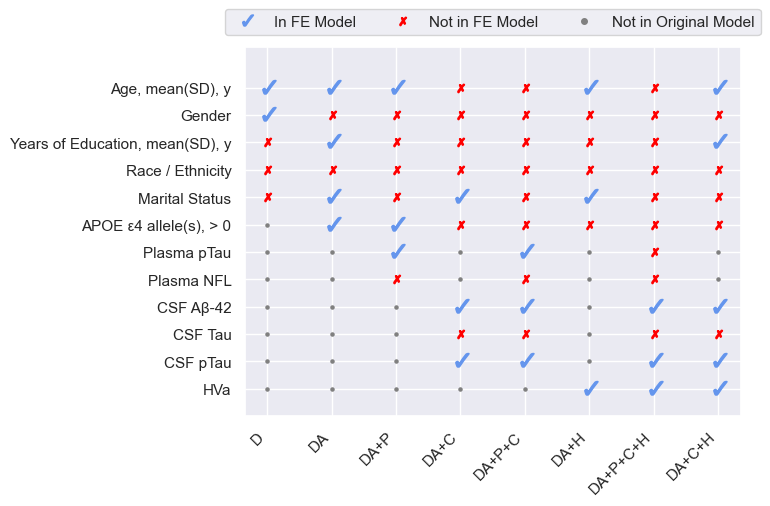

In [34]:
sns.set()
features_engg = demographics + genetics + plasma  + csf_fields + ['VOL_HIPPOCAMPUS']
all_ft_as_int = {}
features_engg.reverse()
for i, ft in enumerate(features_engg) :
    all_ft_as_int[ft] = 2*(i + 1)
yes = '$\u2713$'
no = '$\u2717$'
na = 'o'
fig, ax = plt.subplots(1)
ax.set_ylim(0, 2*len(all_ft_as_int.keys()) + 3)
ax.set_yticks((np.arange(len(all_ft_as_int.keys())) + 1)*2)
ax.set_yticklabels([display(f) for f in features_engg])
x_labels = []
for model_output in output:
    mod_cols = model_output["cols"]
    final_cols = model_output["final_features"]
    mod_label = model_output["label"]
    chi2, p = mcnemar_test(TRAIN_DATA, mod_cols, final_cols, train_ycol, test_ycol)
    print(mod_label, chi2, p)
    if 'NP' in mod_label:
        continue
    x_labels.append(mod_label)
    y_yes, y_no, y_na = [], [], []
    for col in all_ft_as_int:
        y_idx = all_ft_as_int[col]
        if col in mod_cols:
            if col in final_cols:
                y_yes.append(y_idx)
            else:
                y_no.append(y_idx)
        else :
            y_na.append(y_idx)
    # y = [all_ft_as_int[col] for col in final_cols]
    # x = [] * (len(y))
    x_yes = [mod_label] * (len(y_yes))
    x_no = [mod_label] * (len(y_no))
    x_na = [mod_label] * (len(y_na))
    ax.scatter(x_yes, y_yes, marker=yes, s=150, color='cornflowerblue')
    ax.scatter(x_no, y_no, marker=no, color='red')
    ax.scatter(x_na, y_na,  color='grey', s=5)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(x_labels, rotation=45, ha='right')

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker=yes, markersize=10, color='cornflowerblue', label='In FE Model', ls=''),
                   Line2D([0], [0], marker=no, color='red', label='Not in FE Model', ls=''),
                   Line2D([0], [0], marker=na, markersize=4, color='grey', label='Not in Original Model', ls='')]

ax.legend(handles=legend_elements,
          bbox_to_anchor=(0., 1.02, 1., .102), loc='upper center',
                      ncol=3)
fig.savefig(figures_folder+'/chosen_fields_by_model.png', bbox_inches='tight', dpi=300)
print('Figure saved in ', figures_folder)

## Overall Training Metrics

In [37]:
labels = ["D", "DA","DA+P","DA+C","DA+H","DA+P+C","DA+C+H","DA+P+C+H","DA+NP"]
json_mapping = {}

for i, label in enumerate(labels):
    json_mapping[label] = i+1


In [38]:
def getMetricColumns(df) :
    cols = [c for c in df.columns if not ('test' in c\
                                                      or 'time' in c\
                                                      or 'err' in c)]
    return cols + ['auc_err']

def makeColsUpper(df) :
    upCols = []
    for c in df.columns :
        if 'err' in c :
            fd = c.split('_')[0]
            upCols.append(fd.upper() + '_err')
        else :
            upCols.append(c.upper())
    df.columns = upCols
    return df

print('Training metrics :')
# training_metrics.getDF().index.names = ["Model", "Feature set", "N (%AD)"]
training_metrics_df['ranking'] = training_metrics_df.model.map(json_mapping)

training_metrics_base_full = training_metrics_df[training_metrics_df['feature'] == 'ALL'].drop(columns='feature')\
                        .set_index(['model','count'])\
                        .sort_values(by=['ranking'])\
                        .drop(columns='ranking')
training_metrics_base_full.index.names = ["Model", "N (AD%)"]
training_metrics_base = training_metrics_base_full[getMetricColumns(training_metrics_base_full)]
training_metrics_base = makeColsUpper(training_metrics_base) 
training_metrics_base['AUC_form'] = training_metrics_base.AUC.astype(str) + ' (' + training_metrics_base.AUC_err.astype(str) + ')'
training_metrics_base[["SEN","SPE","PPV","NPV","AUC_form"]]

Training metrics :


,,SEN,SPE,PPV,NPV,AUC_form
Model,N (AD%),,,,,
D,254(38.19%),46.5,65.1,46.3,65.9,0.56 (0.03)
DA,254(38.19%),58.6,79.0,63.5,75.7,0.69 (0.02)
DA+P,254(38.19%),61.8,82.8,69.6,77.8,0.72 (0.02)
DA+C,254(38.19%),78.4,87.9,80.0,86.8,0.83 (0.01)
DA+H,254(38.19%),81.3,89.8,83.0,88.7,0.86 (0.02)
DA+P+C,254(38.19%),79.3,87.9,80.2,87.4,0.84 (0.01)
DA+C+H,254(38.19%),88.5,93.6,90.1,93.1,0.91 (0.02)
DA+P+C+H,254(38.19%),87.5,94.2,90.7,92.6,0.91 (0.02)
DA+NP,237(34.18%),92.6,97.4,95.3,96.3,0.95 (0.01)


In [39]:
print('Training metrics FINAL:')
# training_metrics.getDF().index.names = ["Model", "Feature set", "N (%AD)"]
training_metrics_final_full = training_metrics_df[training_metrics_df['feature'] == 'FINAL'].drop(columns='feature')\
                        .set_index(['model','count'])\
                        .sort_values(by=['ranking'])\
                        .drop(columns='ranking')
training_metrics_final_full.index.names = ["Model", "N (AD%)"]
training_metrics_final = training_metrics_final_full[getMetricColumns(training_metrics_final_full)]
training_metrics_final = makeColsUpper(training_metrics_final)
training_metrics_final['AUC_form'] = training_metrics_final.AUC.astype(str) + ' (' + training_metrics_final.AUC_err.astype(str) + ')'
training_metrics_final[["SEN","SPE","PPV","NPV","AUC_form"]]

Training metrics FINAL:


,,SEN,SPE,PPV,NPV,AUC_form
Model,N (AD%),,,,,
D,254(38.19%),47.5,68.9,49.4,67.9,0.58 (0.02)
DA,254(38.19%),63.9,80.3,68.2,78.3,0.72 (0.01)
DA+P,254(38.19%),64.8,85.9,74.7,80.3,0.75 (0.02)
DA+C,254(38.19%),78.4,85.4,76.7,86.7,0.82 (0.02)
DA+H,254(38.19%),81.4,89.8,82.8,89.1,0.86 (0.03)
DA+P+C,254(38.19%),77.3,87.3,79.0,86.5,0.82 (0.03)
DA+C+H,254(38.19%),84.6,94.3,90.3,90.8,0.89 (0.01)
DA+P+C+H,254(38.19%),87.6,93.0,89.5,92.5,0.9 (0.01)
DA+NP,253(37.94%),96.9,93.6,90.8,98.1,0.95 (0.01)


### ADNI - Diagnosis prediction

**Ease of Data Acquisition : 1 - Easiest**

||Time/Accessibility| Cost| Invasive| Total|
| --- | --- | --- |--- |--- |
|Demographics     |1                  |1        |1       |3|
|Plasma           |2                  |2        |2       |6|
|MRI              |3                  |4        |1       |8|
|CSF              |5                  |4        |3      |12|
|NeuroPsych       |4                  |3        |1       |8|


Within Neuropsych : Complexity of acquisition differs by the assessment
 - MMSE is easy to get
 - 


Demographics, NP, MRI, Plasma, CSF -> Sequence

### Overall MCI Prediction Metrics

In [40]:
print('Prediction of MCI -> ABP_DEM')
pred_metrics_df['ranking'] = pred_metrics_df.model.map(json_mapping)

prediction_metrics_base_full = pred_metrics_df[pred_metrics_df['feature'] == 'ALL']\
                    .drop(columns='feature')\
                    .set_index(['dataset','model','count'])\
                    .sort_values(by=['dataset', 'ranking'], ascending=[False, True])\
                    .drop(columns='ranking')
prediction_metrics_base_full.index.names = ["Dataset", "Model", "N"]
prediction_metrics_base = prediction_metrics_base_full[getMetricColumns(prediction_metrics_base_full)]
prediction_metrics_base = makeColsUpper(prediction_metrics_base) 
prediction_metrics_base['AUC_form'] = prediction_metrics_base.AUC.astype(str) + ' (' + prediction_metrics_base.AUC_err.astype(str) + ')'
prediction_metrics_base[["SEN","SPE","PPV","NPV","AUC_form","BP"]]

Prediction of MCI -> ABP_DEM


SEN   SPE   PPV    NPV     AUC_form    BP
Dataset Model    N                                               
ALL     D        734  40.4   60.1  26.5  73.9   0.5 (0.02)   26.3
        DA       728  51.0   66.6  35.4  79.2   0.59 (0.02)  26.4
        DA+P     363  61.3   78.1  36.5  90.7   0.7 (0.03)   17.1
        DA+C     457  67.7   70.0  46.5  84.9   0.69 (0.02)  27.8
        DA+H     409  66.7   68.2  31.0  90.6   0.68 (0.03)  17.6
        DA+P+C   279  75.0   76.3  46.4  91.8   0.76 (0.03)  21.5
        DA+C+H   311  77.6   76.2  47.3  92.5   0.77 (0.03)  21.5
        DA+P+C+H 277  71.7   77.0  46.2  90.8   0.74 (0.03)  21.7
        DA+NP    718  66.0   78.9  53.2  86.5   0.72 (0.02)  26.6
AB-     D        184  33.3   70.2  3.6   96.9   0.52 (0.11)  3.3 
        DA       184  16.7   74.7  2.2   96.4   0.46 (0.08)  3.3 
        DA+P     168  33.3   86.4  8.3   97.2   0.6 (0.11)   3.6 
        DA+C     109  50.0   76.2  7.4   97.6   0.63 (0.15)  3.7 
        DA+H     178  66.7   62.2  5.8   98.2   0.64 (0.11)  3.4 
        DA+P+C   101  25.0   78.4  4.5   96.2   0.52 (0.13)  4.0 
        DA+C+H   106  100.0  80.4  16.7  100.0  0.9 (0.02)   3.8 
        DA+P+C+H 99   75.0   77.9  12.5  98.7   0.76 (0.13)  4.0 
        DA+NP    178  100.0  68.0  9.8   100.0  0.84 (0.02)  3.4 
AB+     D        207  54.1   60.3  36.3  75.9   0.57 (0.04)  29.5
        DA       206  57.4   57.9  36.5  76.4   0.58 (0.04)  29.6
        DA+P     193  52.7   76.1  46.8  80.2   0.64 (0.04)  28.5
        DA+C     185  53.3   78.4  54.2  77.8   0.66 (0.04)  32.4
        DA+H     206  67.2   64.8  44.6  82.5   0.66 (0.04)  29.6
        DA+P+C   176  47.3   79.3  51.0  76.8   0.63 (0.04)  31.2
        DA+C+H   185  60.0   76.0  54.5  79.8   0.68 (0.04)  32.4
        DA+P+C+H 176  52.7   77.7  51.8  78.3   0.65 (0.04)  31.2
        DA+NP    205  58.3   81.4  56.5  82.5   0.7 (0.04)   29.3

In [224]:
print('Prediction of MCI -> ABP_DEM : FINAL Models')
prediction_metrics_final_full = pred_metrics_df[pred_metrics_df['feature'] == 'FINAL']\
                    .drop(columns='feature')\
                    .set_index(['dataset','model','count'])\
                    .sort_values(by=['dataset', 'ranking'], ascending=[False, True])\
                    .drop(columns='ranking')
prediction_metrics_final_full.index.names = ["Dataset", "Model", "N"]
prediction_metrics_final = prediction_metrics_final_full[getMetricColumns(prediction_metrics_final_full)]
prediction_metrics_final = makeColsUpper(prediction_metrics_final)
prediction_metrics_final['AUC_form'] = prediction_metrics_final.AUC.astype(str) + ' (' + prediction_metrics_final.AUC_err.astype(str) + ')'
prediction_metrics_final[["SEN","SPE","PPV","NPV","AUC_form","BP"]]

Prediction of MCI -> ABP_DEM : FINAL Models


SEN   SPE   PPV    NPV     AUC_form    BP
Dataset Model    N                                               
ALL     DA       728  50.0   60.8  31.4  77.3   0.55 (0.02)  26.4
        DA+P     363  54.8   74.1  30.4  88.8   0.64 (0.03)  17.1
        DA+C     460  64.6   69.4  44.6  83.7   0.67 (0.02)  27.6
        DA+H     414  67.1   68.3  31.2  90.7   0.68 (0.03)  17.6
        DA+P+C   279  68.3   75.8  43.6  89.7   0.72 (0.03)  21.5
        DA+C+H   313  76.1   76.8  47.2  92.2   0.76 (0.03)  21.4
        DA+P+C+H 313  79.1   76.0  47.3  93.0   0.78 (0.03)  21.4
        DA+NP    732  79.3   59.4  41.1  88.9   0.69 (0.02)  26.4
AB-     DA       184  33.3   68.5  3.4   96.8   0.51 (0.11)  3.3 
        DA+P     168  33.3   77.8  5.3   96.9   0.56 (0.11)  3.6 
        DA+C     109  25.0   76.2  3.8   96.4   0.51 (0.13)  3.7 
        DA+H     178  66.7   68.0  6.8   98.3   0.67 (0.11)  3.4 
        DA+P+C   101  50.0   82.5  10.5  97.6   0.66 (0.15)  4.0 
        DA+C+H   106  50.0   77.5  8.0   97.5   0.64 (0.15)  3.8 
        DA+P+C+H 106  100.0  79.4  16.0  100.0  0.9 (0.02)   3.8 
        DA+NP    183  100.0  55.9  7.1   100.0  0.78 (0.02)  3.3 
AB+     DA       206  60.7   53.1  35.2  76.2   0.57 (0.04)  29.6
        DA+P     193  52.7   73.2  43.9  79.5   0.63 (0.04)  28.5
        DA+C     186  50.0   77.0  50.8  76.4   0.64 (0.04)  32.3
        DA+H     207  60.7   70.5  46.2  81.1   0.66 (0.04)  29.5
        DA+P+C   176  32.7   81.0  43.9  72.6   0.57 (0.04)  31.2
        DA+C+H   186  55.0   76.2  52.4  78.0   0.66 (0.04)  32.3
        DA+P+C+H 186  56.7   76.2  53.1  78.7   0.66 (0.04)  32.3
        DA+NP    207  72.1   65.1  46.3  84.8   0.69 (0.04)  29.5

### Metrics when appending features in decreasing order of weights

In [41]:
inc = metrics_by_feature_addition_df[~metrics_by_feature_addition_df["feature"].str.contains('ALL|FINAL')]
_all = metrics_by_feature_addition_df[(metrics_by_feature_addition_df["feature"] == 'ALL') \
                                   & (metrics_by_feature_addition_df["metric"] == 'auc')][['model', 'value']]
inc = pd.merge(inc, _all.rename(columns={'value' : 'model_AUC'}), how='left', on='model')
inc['model_with_AUC'] = inc[['model', 'model_AUC']].apply(lambda x: '{} ({})'.format(x['model'], x['model_AUC']), axis=1)
inc = inc.drop(columns='model')
df = inc.pivot(index=['model_AUC', 'model_with_AUC', 'feature_weight', 'feature'],columns='metric')
metrics_feature_eng = df.sort_values(by=['model_AUC', 'model_with_AUC', 'feature_weight'], ascending=[True, True, False])\
                        .droplevel('model_AUC')
 
print('Model Metrics by Feature Addition')
metrics_feature_eng.index.names = ['Model (AUC with all features)', 'Feature weight', 'Feature']
metrics_feature_eng_full = metrics_feature_eng.droplevel(0, axis=1)
metrics_feature_eng = metrics_feature_eng_full[getMetricColumns(metrics_feature_eng_full)]
metrics_feature_eng = makeColsUpper(metrics_feature_eng) 
metrics_feature_eng

Model Metrics by Feature Addition


ACC   AUC  \
Model (AUC with all features) Feature weight Feature                       
D (0.56)                       0.057         AGE              59.9  0.57   
                              -0.013         +PTGENDER        60.6  0.58   
DA (0.69)                      0.171         APOE4            67.7  0.67   
                               0.101         +AGE             71.7  0.69   
                               0.037         +PTMARRY         75.2  0.74   
                               0.002         +PTEDUCAT        76.4  0.75   
DA+P (0.72)                    0.094         PLASMA_PTAU      64.2  0.62   
                               0.085         +APOE4           73.6  0.72   
                               0.029         +AGE             78.3  0.76   
DA+C (0.83)                    0.145         CSF_AB42         72.1  0.71   
                               0.042         +CSF_PTAU        81.1  0.80   
                               0.009         +PTMARRY         81.5  0.81   
DA+P+C (0.84)                  0.096         CSF_AB42         72.1  0.71   
                               0.035         +CSF_PTAU        81.9  0.81   
                               0.009         +PLASMA_PTAU     83.9  0.83   
DA+H (0.86)                    0.317         VOL_HIPPOCAMPUS  79.5  0.78   
                               0.021         +AGE             86.2  0.85   
                               0.003         +PTMARRY         86.7  0.86   
DA+C+H (0.91)                  0.154         VOL_HIPPOCAMPUS  79.5  0.78   
                               0.037         +CSF_AB42        86.2  0.85   
                               0.016         +CSF_PTAU        90.5  0.90   
                               0.003         +PTEDUCAT        91.3  0.91   
                               0.002         +AGE             92.5  0.92   
DA+P+C+H (0.91)                0.128         VOL_HIPPOCAMPUS  79.5  0.78   
                               0.031         +CSF_AB42        85.4  0.84   
                               0.016         +CSF_PTAU        90.5  0.90   
DA+NP (0.95)                   0.097         ADAS11           94.9  0.95   

                                                               NPV  NRI   PPV  \
Model (AUC with all features) Feature weight Feature                            
D (0.56)                       0.057         AGE              66.8  1.0  48.1   
                              -0.013         +PTGENDER        67.8  1.0  49.5   
DA (0.69)                      0.171         APOE4            77.6  1.0  59.9   
                               0.101         +AGE             76.9  1.0  63.2   
                               0.037         +PTMARRY         80.6  1.0  66.9   
                               0.002         +PTEDUCAT        80.8  1.0  70.0   
DA+P (0.72)                    0.094         PLASMA_PTAU      71.6  1.0  53.5   
                               0.085         +APOE4           79.5  1.0  65.6   
                               0.029         +AGE             81.3  1.0  73.9   
DA+C (0.83)                    0.145         CSF_AB42         77.9  1.0  63.6   
                               0.042         +CSF_PTAU        85.2  1.0  75.3   
                               0.009         +PTMARRY         86.1  1.0  75.2   
DA+P+C (0.84)                  0.096         CSF_AB42         77.9  1.0  63.6   
                               0.035         +CSF_PTAU        85.9  1.0  75.9   
                               0.009         +PLASMA_PTAU     86.3  1.0  80.1   
DA+H (0.86)                    0.317         VOL_HIPPOCAMPUS  83.2  1.0  75.1   
                               0.021         +AGE             89.4  1.0  81.4   
                               0.003         +PTMARRY         89.2  1.0  82.8   
DA+C+H (0.91)                  0.154         VOL_HIPPOCAMPUS  83.2  1.0  75.1   
                               0.037         +CSF_AB42        87.7  1.0  84.2   
                               0.016         +CSF_PTAU        92.3  1.0  88.

### [TEST - MCI] Metrics when appending features in decreasing order of weights

In [158]:
inc = MCI_metrics_by_feature_addition_df[~MCI_metrics_by_feature_addition_df["feature"].str.contains('ALL|FINAL')]
_all = MCI_metrics_by_feature_addition_df[(MCI_metrics_by_feature_addition_df["feature"] == 'ALL') \
                                   & (MCI_metrics_by_feature_addition_df["metric"] == 'auc')][['dataset', 'model', 'value']]
inc = pd.merge(inc, _all.rename(columns={'value' : 'model_AUC'}), how='left', on=['dataset', 'model'])
inc['model_with_AUC'] = inc[['model', 'model_AUC']].apply(lambda x: '{} ({})'.format(x['model'], x['model_AUC']), axis=1)
inc = inc.drop(columns='model')
df = inc.pivot(index=['dataset', 'model_AUC', 'model_with_AUC', 'feature_weight', 'feature'],columns='metric')
predictions_metrics_feature_eng = df.sort_values(by=['dataset', 'model_AUC', 'model_with_AUC',  'feature_weight'], ascending=[False, True, True, False])\
                                    .droplevel('model_AUC')
print('Prediction Metrics by Feature Addition')
predictions_metrics_feature_eng.index.names = ['Dataset', 'Model (AUC with all features)', 'Feature weight', 'Feature']
predictions_metrics_feature_eng_full = predictions_metrics_feature_eng.droplevel(0, axis=1)
predictions_metrics_feature_eng = predictions_metrics_feature_eng_full[getMetricColumns(predictions_metrics_feature_eng_full)]
predictions_metrics_feature_eng = makeColsUpper(predictions_metrics_feature_eng) 
predictions_metrics_feature_eng

Prediction Metrics by Feature Addition


ACC  \
Dataset Model (AUC with all features) Feature weight Feature                 
ALL     DA (0.6)                      0.176          APOE4            65.4   
                                      0.046          +PTMARRY         68.1   
        DA+C (0.69)                   0.140          CSF_AB42         61.5   
                                      0.062          +CSF_PTAU        70.4   
                                      0.010          +PTMARRY         72.1   
                                      0.008          +APOE4           74.9   
        DA+P+C (0.7)                  0.097          CSF_AB42         64.8   
                                      0.049          +CSF_PTAU        73.3   
                                      0.011          +PLASMA_PTAU     72.2   
                                      0.010          +APOE4           72.2   
        DA+H (0.71)                   0.319          VOL_HIPPOCAMPUS  64.4   
                                      0.021          +AGE             67.6   
        DA+P+C+H (0.73)               0.124          VOL_HIPPOCAMPUS  71.8   
                                      0.030          +CSF_AB42        68.4   
                                      0.015          +CSF_PTAU        77.6   
        DA+NP (0.75)                  0.088          ADAS11           71.9   
        DA+P (0.75)                   0.101          PLASMA_PTAU      69.9   
                                      0.070          +APOE4           67.8   
                                      0.022          +PLASMA_NFL      71.2   
                                      0.018          +AGE             75.0   
                                      0.000          +PTGENDER        75.8   
AB-     DA+C (0.55)                   0.140          CSF_AB42         73.3   
                                      0.062          +CSF_PTAU        72.0   
                                      0.010          +PTMARRY         73.3   
                                      0.008          +APOE4           74.7   
        DA+P+C (0.55)                 0.097          CSF_AB42         65.2   
                                      0.049          +CSF_PTAU        72.5   
                                      0.011          +PLASMA_PTAU     68.1   
                                      0.010          +APOE4           71.0   
        DA (0.62)                     0.176          APOE4            75.0   
                                      0.046          +PTMARRY         75.0   
        DA+NP (0.66)                  0.088          ADAS11           61.3   
        DA+P (0.67)                   0.101          PLASMA_PTAU      70.6   
                                      0.070          +APOE4           78.2   
                                      0.022          +PLASMA_NFL      77.3   
                                      0.018          +AGE             82.4   
                                      0.000          +PTGENDER        80.7   
        DA+H (0.7)                    0.319          VOL_HIPPOCAMPUS  59.2   
                                      0.021          +AGE             68.0   
        DA+P+C+H (0.78)               0.124          VOL_HIPPOCAMPUS  62.7   
                                      0.030          +CSF_AB42        64.2   
                                      0.015          +CSF_PTAU        73.1   
AB+     DA+P+C (0.61)                 0.097          CSF_AB42         56.2   
                                      0.049          +CSF_PTAU        66.7   
                                      0.011          +PLASMA_PTAU     65.7   
                                      0.010          +APOE4           64.8   
        DA (0.65)                     0.176          APOE4            55.7   
                                      0.046          +PTMARRY         63.1   
        DA+C (0.66)                   0.140          CSF_AB42         63.6   
                                      0.062          +CSF_PTAU        65.5   
               

### Export metrics

In [159]:
def combineAUCFields(df) :
    df['_AUC'] = df[['AUC', 'AUC_err']].apply(lambda x: '{} ({})'.format(x['AUC'], x['AUC_err']), axis=1)
    df = df.drop(columns = ['AUC', 'AUC_err']).rename(columns = {'_AUC' : 'AUC(err)'})
    return df

with pd.ExcelWriter(tables_folder+"/ADNI_Classification.xlsx") as writer:  
    study_chars.to_excel(writer, sheet_name='Study Characteristics')
    demographics_table.to_excel(writer, sheet_name='Demographics')
    mci_demographics_table.to_excel(writer, sheet_name='MCI Demographics')
    combineAUCFields(training_metrics_base).drop(columns='NRI').to_excel(writer, sheet_name='Training ALL Features')
    combineAUCFields(prediction_metrics_base.xs('ALL')).drop(columns='NRI').to_excel(writer, sheet_name='ALL_MCI_Pred_ALL_Features')
    combineAUCFields(prediction_metrics_base.xs('AB+')).drop(columns='NRI').to_excel(writer, sheet_name='ABP_MCI_Pred_ALL_Features')
    combineAUCFields(metrics_feature_eng).to_excel(writer, sheet_name='Feat. Engineering Training')
    combineAUCFields(predictions_metrics_feature_eng.xs('ALL')).drop(columns='NRI').to_excel(writer, sheet_name='ALL_Feat_Engg_Predictions')
    combineAUCFields(predictions_metrics_feature_eng.xs('AB+')).drop(columns='NRI').to_excel(writer, sheet_name='ABP_Feat_Engg_Predictions')
    combineAUCFields(training_metrics_final).drop(columns='NRI').to_excel(writer, sheet_name='Training FINAL Features')
    combineAUCFields(prediction_metrics_final.xs('ALL')).drop(columns='NRI').to_excel(writer, sheet_name='ALL_MCI_Pred_FINAL_Features')
    combineAUCFields(prediction_metrics_final.xs('AB+')).drop(columns='NRI').to_excel(writer, sheet_name='ABP_MCI_Pred_FINAL_Features')


### Sensitivity vs Specificity, AUC by model

In [161]:
def myfunc(x):
    return hasattr(x, 'set_color') and not hasattr(x, 'set_facecolor')

def highlightLegend(leg):
        # match on arbitrary function
    for o in leg.findobj(myfunc):
        if(o.get_text() in ["Model", "Features"]) :
            o.set_color('blue')


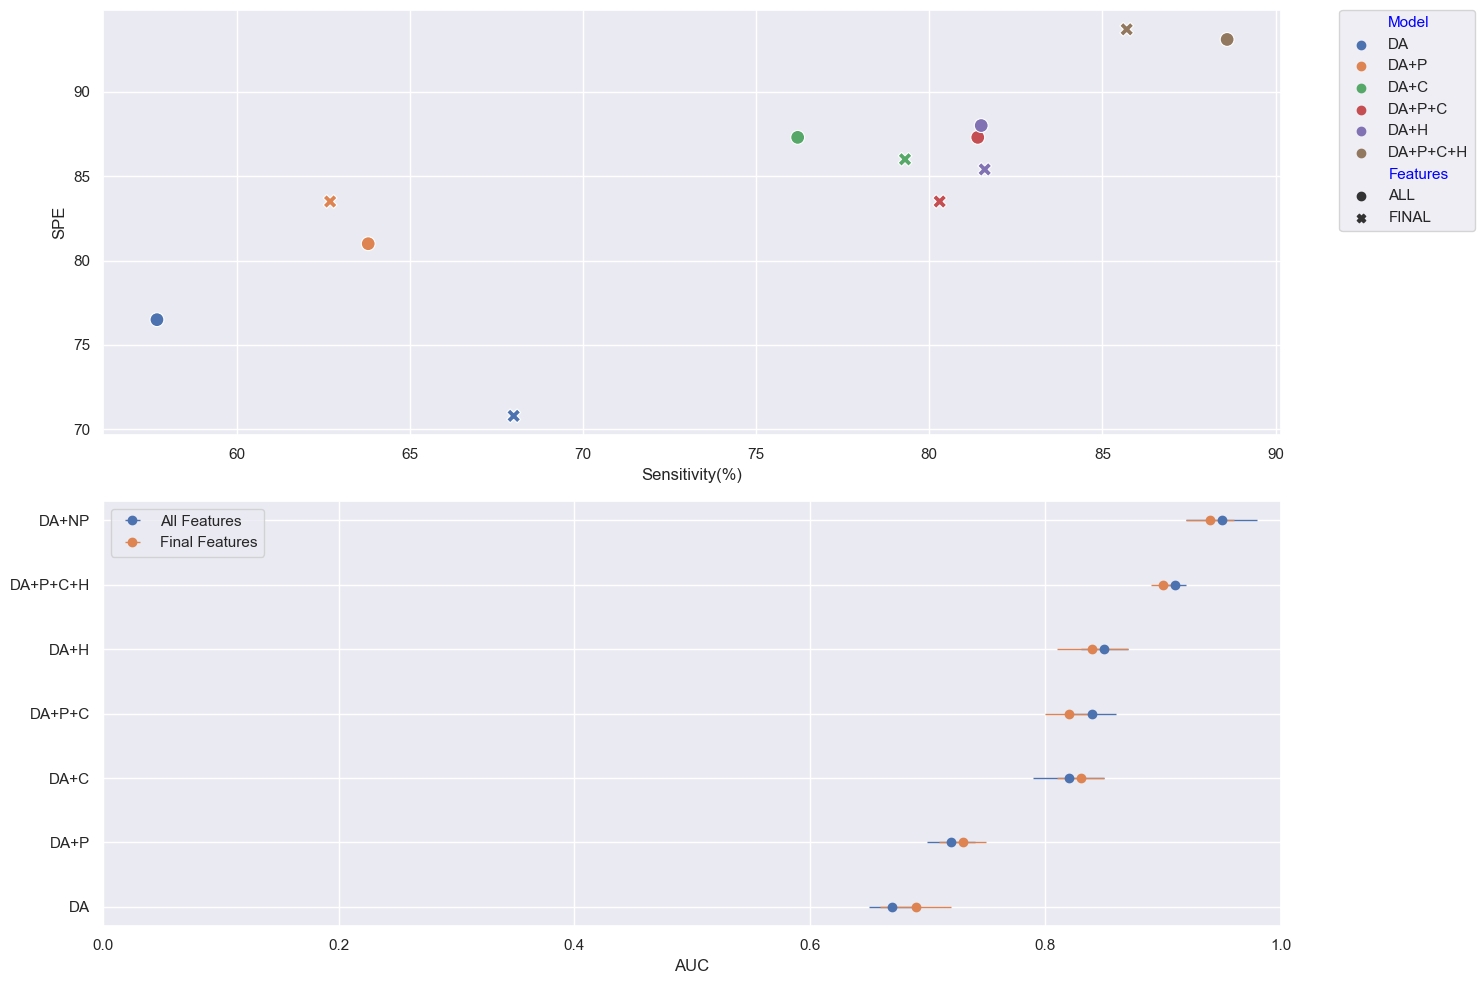

In [162]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
tm = training_metrics_base.reset_index()
tm["Features"] = "ALL"
tf = training_metrics_final.reset_index()
tf["Features"] = "FINAL"
train_met = pd.concat([tm, tf], ignore_index=True)
train_met = train_met[~ (train_met.Model.str.contains('NP'))]
sss = sns.scatterplot(ax=axs[0], x="SEN", y="SPE", 
                     data=train_met, hue="Model", style="Features",
                      s=100
                    )
axs[0].set_xlabel('Sensitivity(%)')
leg = axs[0].legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0., title_fontsize='large')
highlightLegend(leg)


df_all = training_metrics_base.reset_index()
df_final = training_metrics_final.reset_index()
df = df_all[["Model", "AUC", "AUC_err"]].merge(df_final[["Model", "AUC", "AUC_err"]], 
                                           how='left',
                                           on='Model',
                                           suffixes=('_all', '_final'))
# fig, ax = plt.subplots(1, 1)
axs[1].errorbar(df["AUC_all"], df["Model"], xerr=df["AUC_err_all"], fmt='o', linewidth=1, label='All Features')
axs[1].errorbar(df["AUC_final"], df["Model"], xerr=df["AUC_err_final"], fmt='o', linewidth=1, label='Final Features')
axs[1].set_xlim(0, 1)
axs[1].set_xlabel('AUC')
plt.legend()
plt.tight_layout()
fig.savefig(figures_folder+'/metrics-train-all-vs-final.png',bbox_inches='tight', dpi=150)
# fig.savefig(figures_folder+'/sens-spec-all-vs-final.png',bbox_inches='tight', dpi=150)


#### AUC by model

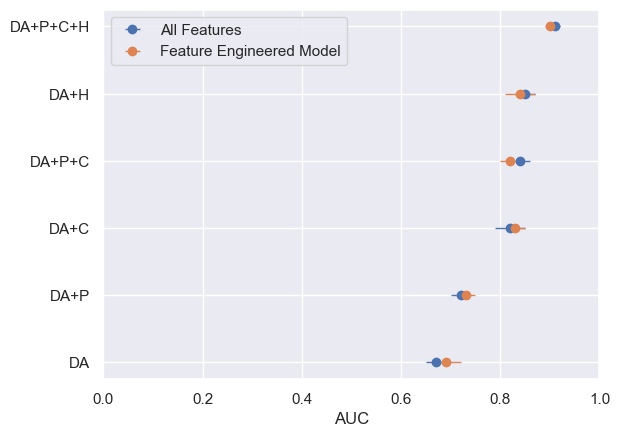

In [163]:
%matplotlib inline
df_all = training_metrics_base.reset_index()
df_final = training_metrics_final.reset_index()
df = df_all[["Model", "AUC", "AUC_err"]].merge(df_final[["Model", "AUC", "AUC_err"]], 
                                           how='left',
                                           on='Model',
                                           suffixes=('_all', '_final'))
df = df[~ (df.Model.str.contains('NP'))]
fig, ax = plt.subplots(1, 1)
ax.errorbar(df["AUC_all"], df["Model"], xerr=df["AUC_err_all"], fmt='o', linewidth=1, label='All Features')
ax.errorbar(df["AUC_final"], df["Model"], xerr=df["AUC_err_final"], fmt='o', linewidth=1, label='Feature Engineered Model')
ax.set_xlim(0, 1)
# plt.xticks(rotation=90)
plt.legend()
ax.set_xlabel('AUC')

plt.show()
# plt.tight_layout()
fig.savefig(figures_folder+'/auc-train-all-vs-final.png',bbox_inches='tight', dpi=150)


### MCI : Prediction, ALL vs Final

#### Sensitivity vs Specificity by model

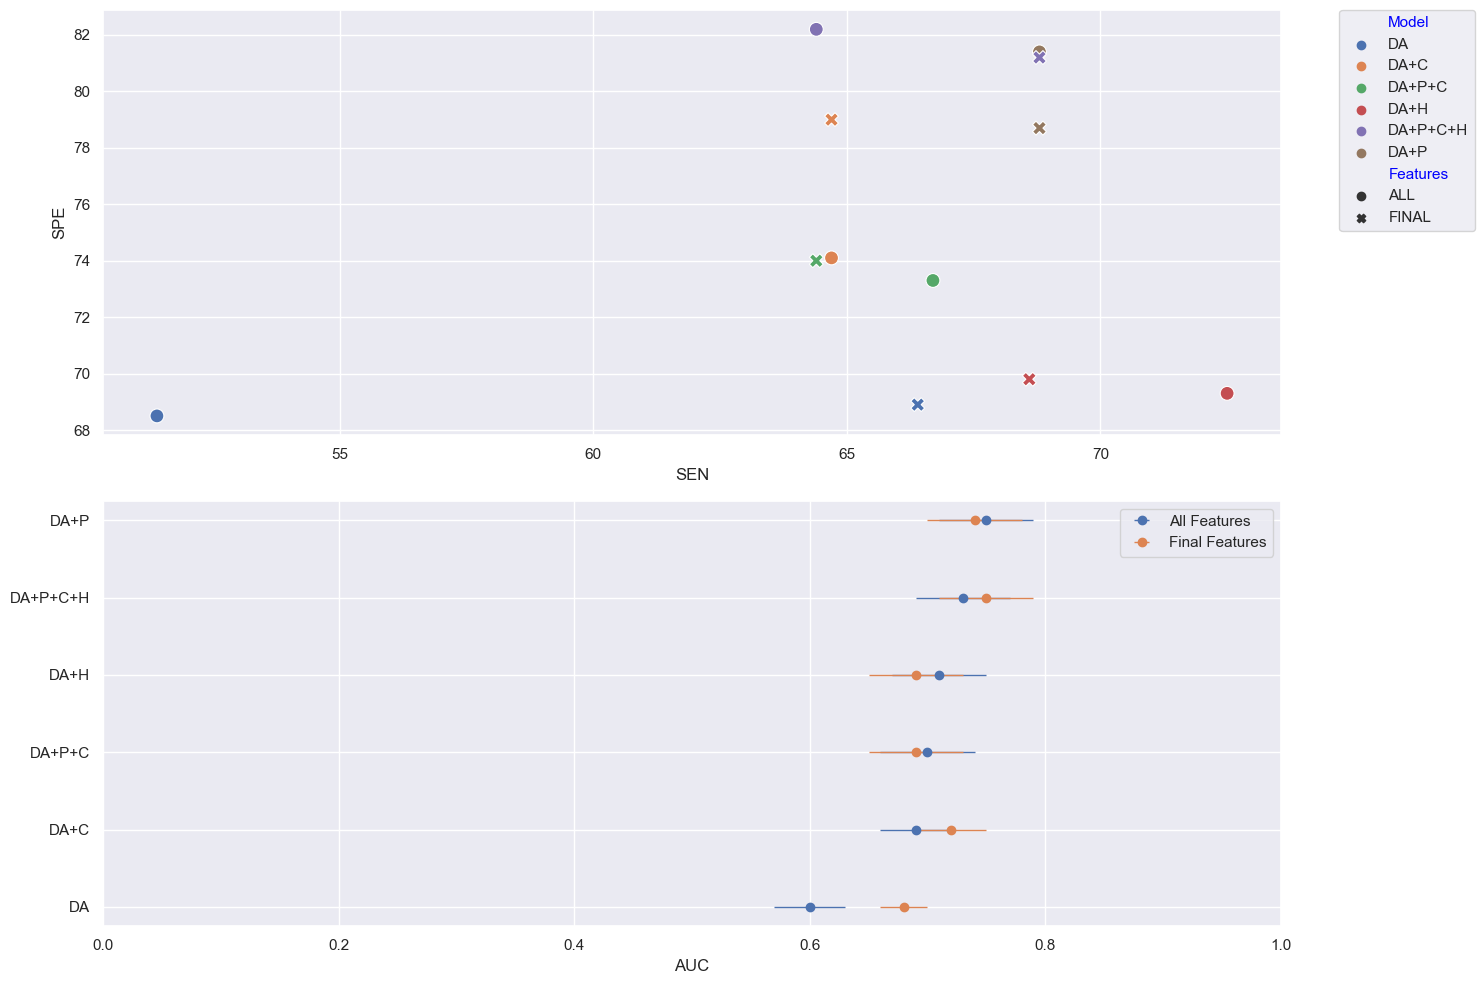

In [164]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
df_all = prediction_metrics_base.reset_index()
df_all = df_all[df_all["Dataset"] == 'ALL']
df_all["Features"] = "ALL"
df_final = prediction_metrics_final.reset_index()
df_final = df_final[df_final["Dataset"] == 'ALL']
df_final["Features"] = "FINAL"
pred_met = pd.concat([df_all, df_final], ignore_index=True)
pred_met = pred_met[~ (pred_met.Model.str.contains('NP'))]
sns.scatterplot(ax=axs[0], x="SEN", y="SPE", 
                     data=pred_met, hue="Model", style="Features",
                s=100
                    )
leg = axs[0].legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
highlightLegend(leg)

##AUC
df_all = prediction_metrics_base.reset_index()
df_all = df_all[df_all["Dataset"] == 'ALL']
df_final = prediction_metrics_final.reset_index()
df_final = df_final[df_final["Dataset"] == 'ALL']

df = df_all[["Model", "AUC", "AUC_err"]].merge(df_final[["Model", "AUC", "AUC_err"]], 
                                           how='left',
                                           on='Model',
                                           suffixes=('_all', '_final'))
df = df[~ (df.Model.str.contains('NP'))]
axs[1].errorbar(df["AUC_all"], df["Model"], xerr=df["AUC_err_all"], fmt='o', linewidth=1, label='All Features')
axs[1].errorbar(df["AUC_final"], df["Model"], xerr=df["AUC_err_final"], fmt='o', linewidth=1, label='Final Features')
axs[1].set_xlim(0, 1)
axs[1].set_xlabel('AUC')
# plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
fig.savefig(figures_folder+'/metrics-mci-all-vs-final.png',bbox_inches='tight', dpi=150)


#### AUC by model

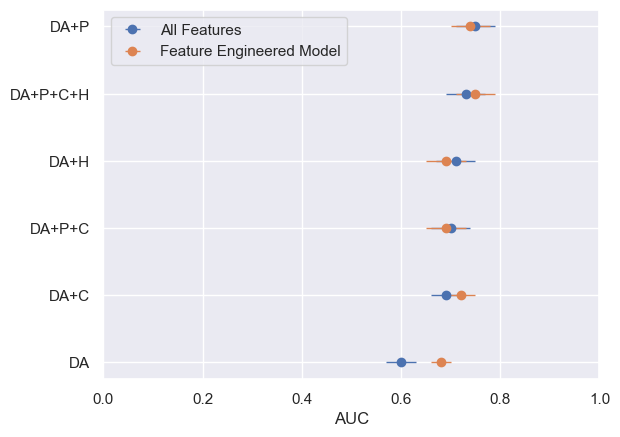

In [165]:
df_all = prediction_metrics_base.reset_index()
df_all = df_all[df_all["Dataset"] == 'ALL']
df_final = prediction_metrics_final.reset_index()
df_final = df_final[df_final["Dataset"] == 'ALL']

df = df_all[["Model", "AUC", "AUC_err"]].merge(df_final[["Model", "AUC", "AUC_err"]], 
                                           how='left',
                                           on='Model',
                                           suffixes=('_all', '_final'))
fig, ax = plt.subplots(1, 1)
df = df[~ (df.Model.str.contains('NP'))]

ax.errorbar(df["AUC_all"], df["Model"], xerr=df["AUC_err_all"], fmt='o', linewidth=1, label='All Features')
ax.errorbar(df["AUC_final"], df["Model"], xerr=df["AUC_err_final"], fmt='o', linewidth=1, label='Feature Engineered Model')
ax.set_xlim(0, 1)
# plt.xticks(rotation=90)
plt.legend()
ax.set_xlabel('AUC')

fig.savefig(figures_folder+'/auc-mci-all-vs-final.png',bbox_inches='tight', dpi=150)


### MCI AB+ : Prediction, ALL vs Final

#### Sensitivity vs Specificity by model

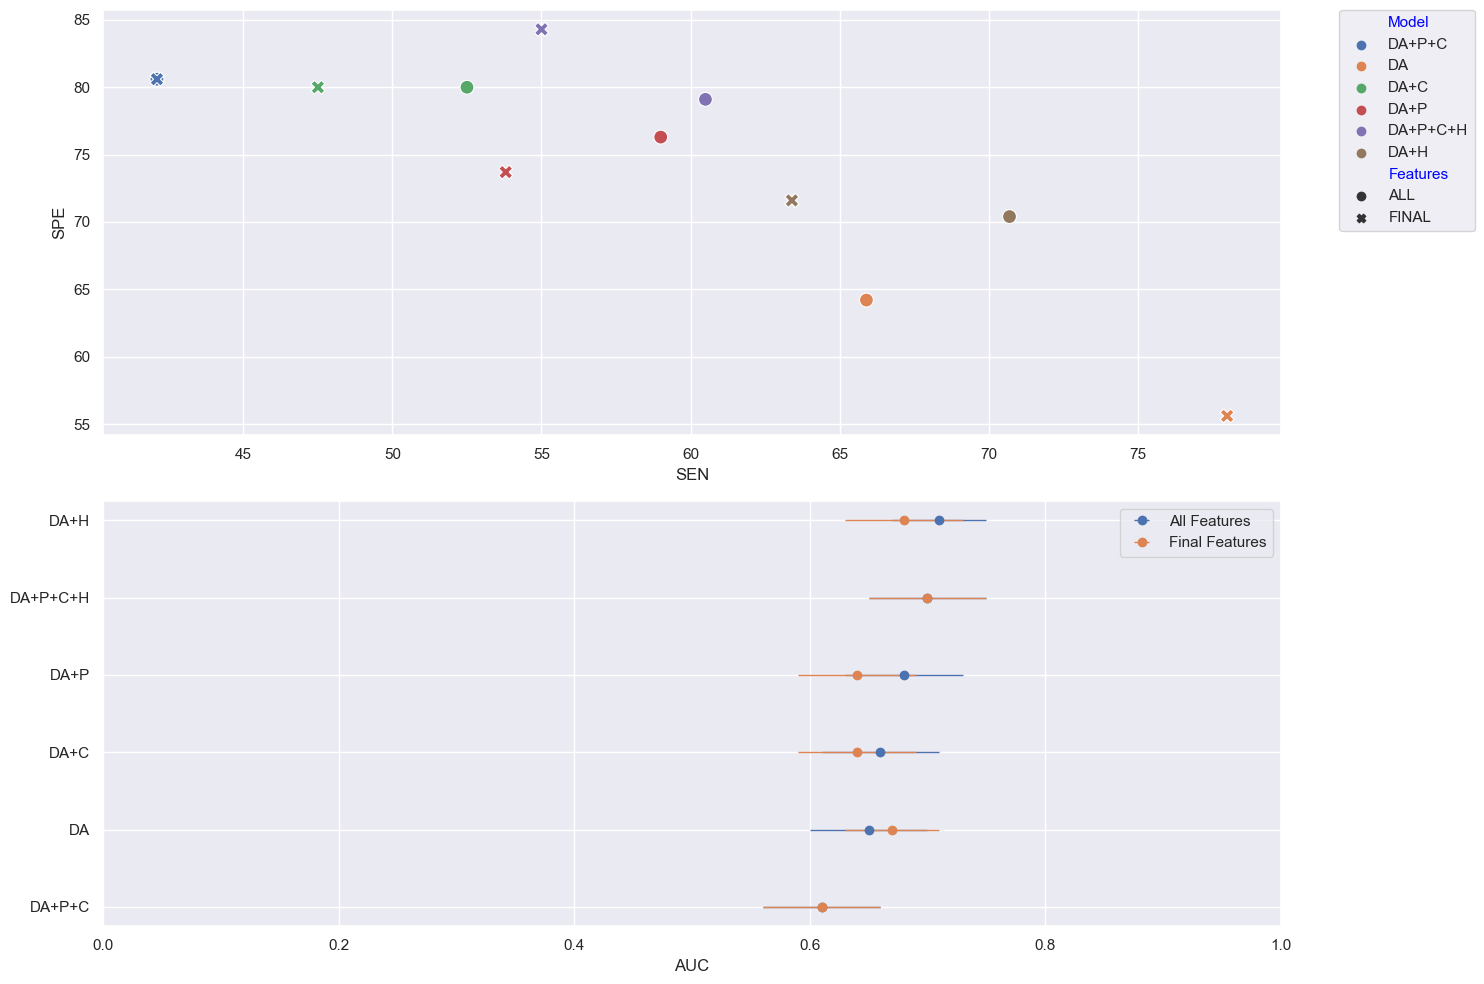

In [166]:
fig, axs = plt.subplots(2, 1, figsize=(15,10))
df_all = prediction_metrics_base.reset_index()
df_all = df_all[df_all["Dataset"] == 'AB+']
df_all["Features"] = "ALL"
df_final = prediction_metrics_final.reset_index()
df_final = df_final[df_final["Dataset"] == 'AB+']
df_final["Features"] = "FINAL"
pred_met = pd.concat([df_all, df_final], ignore_index=True)
pred_met = pred_met[~ (pred_met.Model.str.contains('NP'))]
sns.scatterplot(ax=axs[0], x="SEN", y="SPE", 
                     data=pred_met, hue="Model", style="Features",
                s=100
                    )
leg = axs[0].legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
highlightLegend(leg)

##AUC
df_all = prediction_metrics_base.reset_index()
df_all = df_all[df_all["Dataset"] == 'AB+']
df_final = prediction_metrics_final.reset_index()
df_final = df_final[df_final["Dataset"] == 'AB+']

df = df_all[["Model", "AUC", "AUC_err"]].merge(df_final[["Model", "AUC", "AUC_err"]], 
                                           how='left',
                                           on='Model',
                                           suffixes=('_all', '_final'))
df = df[~ (df.Model.str.contains('NP'))]

axs[1].errorbar(df["AUC_all"], df["Model"], xerr=df["AUC_err_all"], fmt='o', linewidth=1, label='All Features')
axs[1].errorbar(df["AUC_final"], df["Model"], xerr=df["AUC_err_final"], fmt='o', linewidth=1, label='Final Features')
axs[1].set_xlim(0, 1)
axs[1].set_xlabel('AUC')
# plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

fig.savefig(figures_folder+'/metrics-mci-abp-all-vs-final.png',bbox_inches='tight', dpi=150)


#### AUC by model

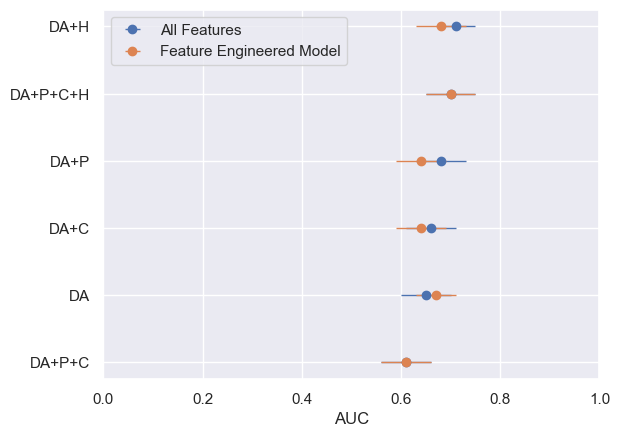

In [167]:
df_all = prediction_metrics_base.reset_index()
df_all = df_all[df_all["Dataset"] == 'AB+']
df_final = prediction_metrics_final.reset_index()
df_final = df_final[df_final["Dataset"] == 'AB+']

df = df_all[["Model", "AUC", "AUC_err"]].merge(df_final[["Model", "AUC", "AUC_err"]], 
                                           how='left',
                                           on='Model',
                                           suffixes=('_all', '_final'))
df = df[~ (df.Model.str.contains('NP'))]
fig, ax = plt.subplots(1, 1)
ax.errorbar(df["AUC_all"], df["Model"], xerr=df["AUC_err_all"], fmt='o', linewidth=1, label='All Features')
ax.errorbar(df["AUC_final"], df["Model"], xerr=df["AUC_err_final"], fmt='o', linewidth=1, label='Feature Engineered Model')
ax.set_xlim(0, 1)
# plt.xticks(rotation=90)
plt.legend()
ax.set_xlabel('AUC')

fig.savefig(figures_folder+'/auc-mci-abp-all-vs-final.png',bbox_inches='tight', dpi=150)


## Dummy code

In [96]:
fc_1 = ['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'PLASMA_PTAU', 'PLASMA_NFL', 'CSF_AB42', 'CSF_TAU', 'CSF_PTAU', 'VOL_HIPPOCAMPUS']

fc = ['AGE', 'PTGENDER', 'PTEDUCAT', 'ETHNICRACE', 'PTMARRY', 'APOE4', 'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting', 'ADAS11', 'TRABSCOR']
fc_1 = fc
cog = TRAIN_DATA[fc_1 + [train_ycol]]
getNulls(cog)
adm_ = cog[fc_1 + [train_ycol]].dropna()
adm_ = encodeCatsAndNormalize(adm_)

# Shuffle the dataset
#     adm = adm.sample(frac = 1).reset_index().drop(['index'], axis=1)
X = adm_[fc_1]
y = adm_[train_ycol]#.reset_index(drop=True)

# # Transform data
sc = StandardScaler()
normed_data = pd.DataFrame(sc.fit_transform(X), columns = X.columns)
# getNulls(X)
skf = StratifiedKFold(n_splits=5)
fis = []
# for train_index, test_index in skf.split(X, y):
# #     print(y.index)
#     print(y.iloc[train_index])
#     getFeatureImportances(normed_data, y)

In [97]:
# display(pd.DataFrame(cog.var(), columns=["Variance"]).T)
from sklearn.preprocessing import StandardScaler, MinMaxScaler
cog = encodeCatsAndNormalize(cog)
normalized_data = MinMaxScaler().fit_transform(cog)
normalized_df = pd.DataFrame(normalized_data, columns = cog.columns)
# display(pd.DataFrame(normalized_df.var(), columns=["Variance"]).T)
normalized_df.var()

AGE                 0.042346
PTGENDER            0.250739
PTEDUCAT            0.054189
ETHNICRACE          0.026669
PTMARRY             0.176901
APOE4               0.117429
RAVLT_immediate     0.045383
RAVLT_learning      0.052975
RAVLT_forgetting    0.019612
ADAS11              0.054048
TRABSCOR            0.091890
ABP_DEM             0.236983
dtype: float64

## Export plots to PPT

In [ ]:
### Exporting dataframes to PPT
from pptx import Presentation
from pptx.enum.shapes import MSO_SHAPE
from pptx.util import Pt, Cm, Inches
from pptx.enum.text import PP_ALIGN
from PIL import Image
import os


def _add_image(slide, placeholder_id, image_url):
    placeholder = slide.placeholders[placeholder_id]
 
    # Calculate the image size of the image
    im = Image.open(image_url)
    width, height = im.size
 
    # Make sure the placeholder doesn't zoom in
    placeholder.height = height
    placeholder.width = width
 
    # Insert the picture
    placeholder = placeholder.insert_picture(image_url)
 
    # Calculate ratios and compare
    image_ratio = width / height
    placeholder_ratio = placeholder.width / placeholder.height
    ratio_difference = placeholder_ratio - image_ratio
 
    # Placeholder width too wide:
    if ratio_difference > 0:
        difference_on_each_side = ratio_difference / 2
        placeholder.crop_left = -difference_on_each_side
        placeholder.crop_right = -difference_on_each_side
    # Placeholder height too high
    else:
        difference_on_each_side = -ratio_difference / 2
        placeholder.crop_bottom = -difference_on_each_side
        placeholder.crop_top = -difference_on_each_side

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
prs = Presentation()
title_slide_layout = prs.slide_layouts[0] 
blank_slide_layout = prs.slide_layouts[8]
# Creating a bar plot
for feature_set in feature_sets_ :
    feature_keys = feature_set["key"]
    feature_cols = feature_set["value"]
    model_label = feature_set["label"]
    df = auc_by_feature_addition[auc_by_feature_addition.index.isin([model_label], level=0)]
#     df = df.head(15)
    X = df.index.get_level_values(1)
    fig, ax = plt.subplots()
#     ax.set_xlabel('Features')
    ax.set_xticks(np.arange(len(X)), X, rotation='vertical')
    ax1 = sns.lineplot(x=X, y=df["AUC"], marker='o', color='tab:blue')
#     ax1.set_ylim([0,1])
    # Add labels to your graph
    ax2 = ax1.twinx()
    ax2.set_ylabel('Feature weight', fontsize=16, color='tab:red')
    ax2 = sns.lineplot(x=X, y=df["feature_weight"], marker='*', markersize=15, color='tab:red', linestyle='')
    ax2.tick_params(axis='y', color='tab:red')
#     ax2.set_ylim([0,100])
    ax1.set_ylabel('AUC (Base prevalance={}%)'.format(round(df["Base prevalance(%)"].mean(), 2)), fontsize=16, color='tab:blue')
    fig.suptitle('Features cumulatively added to the model, left to right')
    filename = 'models-auc/'+model_label.replace(" ", "")+'.png'
    fig.savefig(filename, bbox_inches='tight')
    slide = prs.slides.add_slide(blank_slide_layout)
    sub = slide.placeholders[2].text = '  '
    title = slide.shapes.title.text = model_label
#     text_box = slide.shapes.add_textbox(Cm(5), Cm(1), Cm(14), Cm(12))
#     text_box.text = model_label
#     text_box.text_frame.paragraphs[0].font.size = Pt(32); # Change font size of the textbox
#     text_box.text_frame.paragraphs[0].font.bold = True; # Change font weight of the textbox
    _add_image(slide,1,filename)


In [ ]:
ppt_file = figures_folder+'/ADNI-AD-CN-Classification.pptx'
prs.save(ppt_file)
os.system("open "+ppt_file)
